In [32]:
import numpy 
import IPython
import librosa

from scipy import signal as sp
from scipy.io import wavfile
from math import pi
import math

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 24})

def plot_signal(x, xaxis_label=None,yaxis_label=None, save=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
    
    return


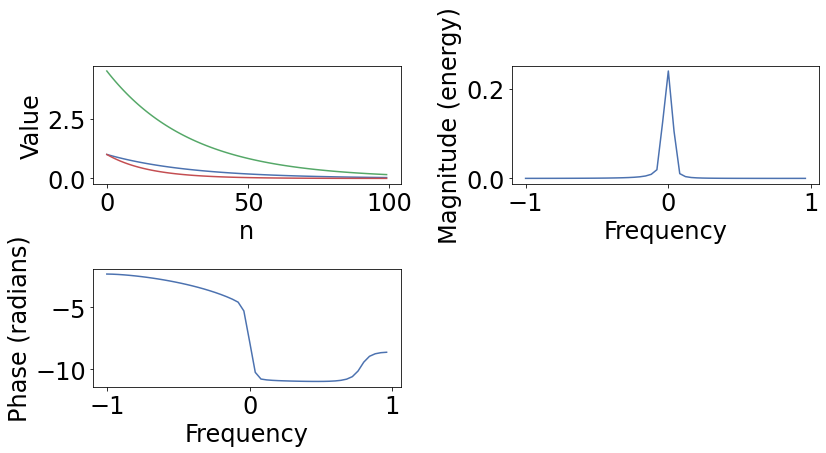

In [33]:
#Problem 1
a=3
t=numpy.linspace(0,10,num=100)
def func(t,i):
    x1=numpy.exp(-t/a)
    plt.subplot(2,2,1)
    plot_signal(x1,'n','Value')
func(t,1)
func(t-1.5*a,2)
func(2*t,3)

#Problem 1-Fourier Transform
w=numpy.linspace(0,10)
def transform(a1,w):
    X0 = a1*(a/(1 + 1j*a*w))
    return X0
#1.2a
X1=transform(1,w)
plt.subplot(2,2,2)
plt.magnitude_spectrum(X1)
plt.subplot(2,2,3)
plt.phase_spectrum(X1)
#1.2b
X2=transform(numpy.exp(-1j*w*1.5*a),w)
#plt.subplot(2,2,4)
#plt.plot(X2)
#1.2c
X3=transform(1/a,w/2)

plt.tight_layout()
plt.show()



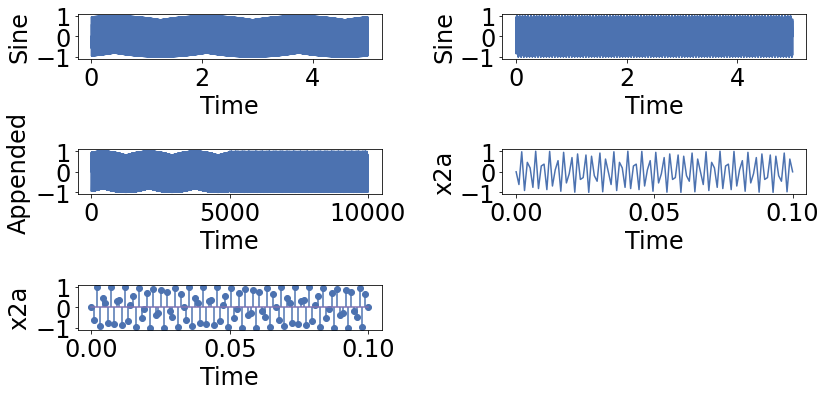

In [34]:
#Problem 2
import numpy as np
from scipy.io.wavfile import write
t=np.linspace(0,5, num=5000)
x2=np.sin(2*numpy.pi*600*t)
x3=np.sin(2*numpy.pi*660*t)
plt.subplot(3,2,1)
plt.plot(t,x2)
plt.xlabel('Time');plt.ylabel('Sine')
plt.subplot(3,2,2)
plt.plot(t,x3)
plt.xlabel('Time');plt.ylabel('Sine')
x4=np.append(x2,x3)
plt.subplot(3,2,3)
plt.plot(x4)
plt.xlabel('Time');plt.ylabel('Appended')
write("appended.wav", 5000, x4.astype(np.float32))
#wavfile.write('appended.wav', 5000, x4)
IPython.display.Audio(x4,rate=5000)
t1=np.linspace(0,0.1, num=100)
x2a=np.sin(2*numpy.pi*600*t1)
x3a=np.sin(2*numpy.pi*660*t1)
x4a=np.append(x2a,x3a)
plt.subplot(3,2,4)
plt.plot(t1,x2a)
plt.xlabel('Time');plt.ylabel('x2a')
plt.subplot(3,2,5)
plt.stem(t1,x2a)
plt.xlabel('Time');plt.ylabel('x2a')

plt.tight_layout()
plt.show()


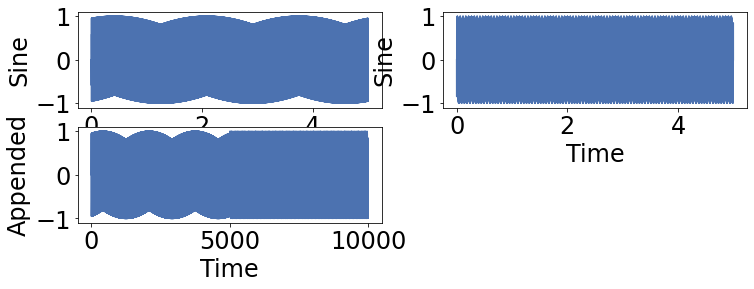

In [35]:
import numpy as np
from scipy.io.wavfile import write
t=np.linspace(0,5, num=5000)
x2=np.sin(2*numpy.pi*600*t)
x3=np.sin(2*numpy.pi*660*t)
plt.subplot(3,2,1)
plt.plot(t,x2)
plt.xlabel('Time');plt.ylabel('Sine')
plt.subplot(3,2,2)
plt.plot(t,x3)
plt.xlabel('Time');plt.ylabel('Sine')
x4=np.append(x2,x3)
plt.subplot(3,2,3)
plt.plot(x4)
plt.xlabel('Time');plt.ylabel('Appended')
write("appended.wav", 5000, x4.astype(np.float32))
#wavfile.write('appended.wav', 5000, x4)
IPython.display.Audio(x4,rate=5000)

In [16]:
import numpy as np
t=np.linspace(0,5, num=5000)
x2=np.sin(2*numpy.pi*600*t)
x3=np.sin(2*numpy.pi*660*t)
x4=np.append(x2,x3)
IPython.display.Audio(x2,rate=5000)
IPython.display.Audio(x3,rate=5000)
IPython.display.Audio(x4,rate=5000)

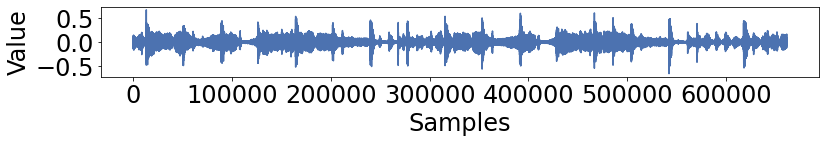

In [36]:
#Problem 3
from scipy.io.wavfile import write
Fs,data=wavfile.read('Track003.wav')
data0 = data[:, 0]
data0=data0/32767
a=np.loadtxt('ConvFile3.txt',dtype=float)
y=sp.convolve(data0,a, mode='same')
plt.subplot(3,1,1)
plt.plot(y)
plt.xlabel('Samples');plt.ylabel('Value')

y1=sp.convolve(data0,a,mode='full')
#plt.subplot(3,1,2)
#plt.plot(y1)
#plt.xlabel('Samples');plt.ylabel('Value')

y2=sp.convolve(data0,a,mode='valid')
#plt.subplot(3,1,3)
#plt.plot(y2)
#plt.xlabel('Samples');plt.ylabel('Value')

plt.tight_layout()

write("convolution.wav", 50000, y.astype(np.float32))
IPython.display.Audio(y1,rate=50000)

Text(0, 0.5, 'Value')

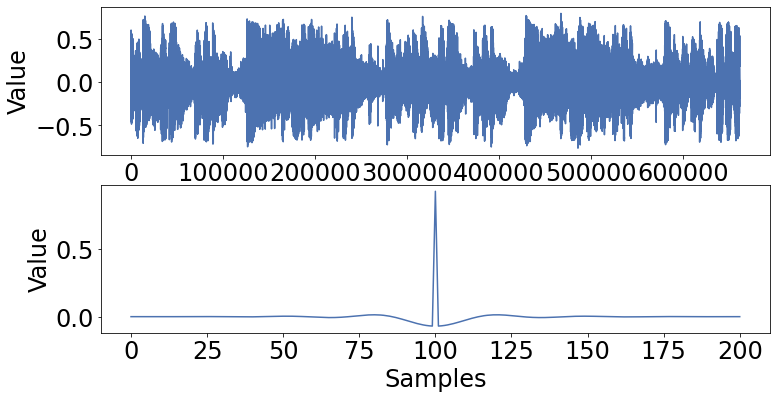

In [6]:
Fs,data=wavfile.read('Track003.wav')
data0 = data[:, 0]
data0=data0/32767
a=np.loadtxt('ConvFile3.txt',dtype=float)
plt.subplot(2,1,1)
plt.plot(data0)
plt.xlabel('Samples');plt.ylabel('Value')
plt.subplot(2,1,2)
plt.plot(a)
plt.xlabel('Samples');plt.ylabel('Value')


sampling rate: 16000Hz


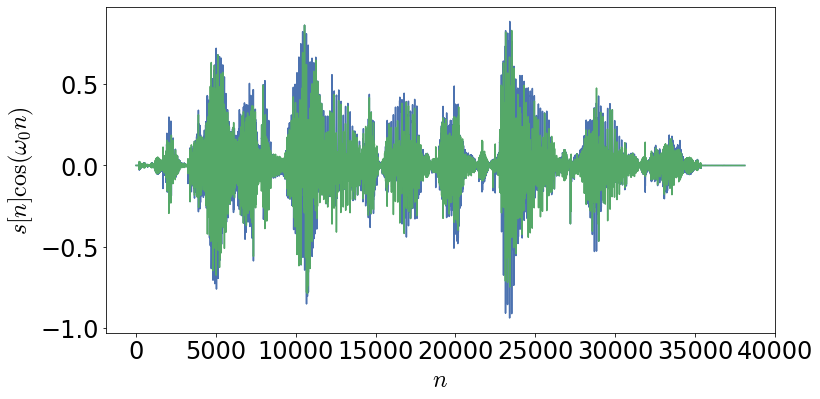

In [7]:
#Problem 4
def plot_signal(x, xaxis_label=None, yaxis_label=None, save=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
    
    return

Fs, s = wavfile.read('speech.wav')
s = s / 32767.0
print('sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(s, rate=Fs)
plot_signal(s, xaxis_label=r'$n$',
    yaxis_label=r'$s[n]\cos(\omega_0n)$', save='output')
def func1(frequency):
    n=np.linspace(0,40000,num=38126)
    y=s*np.cos(2*pi*(frequency/Fs)*n)
    IPython.display.Audio(y, rate=16000)
    plot_signal(y, xaxis_label=r'$n$',
    yaxis_label=r'$s[n]\cos(\omega_0n)$', save='output')

func1(500)


In [8]:
Fs, s = wavfile.read('speech.wav')
s = s / 32767.0
print('sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(s, rate=Fs)

sampling rate: 16000Hz


In [9]:
frequency=500
n=np.linspace(0,40000,num=38126)
y=s*np.cos(2*pi*(frequency/Fs)*n)
IPython.display.Audio(y, rate=16000)